<a href="https://colab.research.google.com/github/lineality/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures%5CGGA_114v3_asnmt_LS_DS_114_Make_Features_Assignment_Geoffrey_Gordon_Ashbrook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-09-06 22:17:33--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.58M   817KB/s    in 27s     

2019-09-06 22:18:01 (806 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22631049]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [4]:
!ls

LoanStats_2018Q4.csv  LoanStats_2018Q4.csv.zip	sample_data


In [0]:
!head LoanStats_2018Q4.csv

In [0]:
!tail LoanStats_2018Q4.csv  

In [0]:
import pandas as pd
  

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, na_values=['n/a'], skipfooter=2)


In [14]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#view list of column headers
list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [18]:
df.shape[0]

128412

In [20]:
df.shape


(128412, 144)

In [21]:
df.shape[1]

144

In [0]:
df = df.drop(columns=['id', 'member_id', 'desc', 'url'])

In [23]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.

In [26]:
df.isnull().sum().sort_values(ascending=False)

orig_projected_additional_accrued_interest    128386
hardship_loan_status                          128385
hardship_dpd                                  128385
hardship_reason                               128385
hardship_status                               128385
deferral_term                                 128385
hardship_amount                               128385
hardship_start_date                           128385
hardship_end_date                             128385
payment_plan_start_date                       128385
hardship_length                               128385
hardship_type                                 128385
hardship_payoff_balance_amount                128385
hardship_last_payment_amount                  128385
settlement_percentage                         128301
debt_settlement_flag_date                     128301
settlement_status                             128301
settlement_date                               128301
settlement_amount                             

Strings

In [27]:
df['int_rate']

0          10.33%
1          23.40%
2          17.97%
3          20.89%
4          23.40%
5          11.80%
6          12.98%
7          18.94%
8          13.56%
9          13.56%
10         19.92%
11         17.97%
12         26.31%
13         14.47%
14         23.40%
15         23.40%
16         20.89%
17         16.91%
18         20.89%
19         14.47%
20         13.56%
21         14.47%
22         12.98%
23         23.40%
24         11.80%
25         20.89%
26         26.31%
27         16.14%
28         18.94%
29         15.02%
30         17.97%
31         13.56%
32         17.97%
33         12.98%
34         11.80%
35         10.72%
36         12.98%
37         11.80%
38         14.47%
39         10.72%
40         11.80%
41         23.40%
42         20.89%
43         19.92%
44         10.33%
45          6.46%
46         14.47%
47         11.31%
48         17.97%
49         15.02%
50          8.81%
51         15.02%
52         16.91%
53         14.47%
54         25.34%
55        

In [28]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [31]:
#Convert int_rate

int_rate = '15.02%'
int_rate[:-1]

'15.02'

In [32]:
#Convert int_rate

int_rate = '15.02%'
int_rate[:1]

'1'

In [33]:
#Convert int_rate

int_rate = '15.02%'
int_rate[1:]

'5.02%'

In [34]:
int_rate.strip('%')

'15.02'

In [0]:
#int_rate.replace('.', '')

In [37]:
#find type
type(int_rate.strip('%'))

str

In [38]:
float(int_rate.strip('%'))

15.02

In [40]:
type(float(int_rate.strip('%')))

float

In [44]:
#func
def remove_percent_to_float(x):
  return float(x.strip('%'))

remove_percent_to_float(int_rate) 

15.02

In [0]:
#func
def remove_percent_to_float(x):
  return float(x.strip('%'))

remove_percent_to_float

In [43]:
# Write a function that will work on any given cell in a dataframe column
def remove_percent_to_float(string):
  return float(string.strip('%'))

remove_percent_to_float(int_rate)

15.02

apply function

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent_to_float)

In [63]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,9

In [48]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

List Comprehension 

In [0]:
int_list = ['15.02%', '13.56%', '16.91%']

In [52]:
[remove_percent_to_float(item) for item in int_list]

[15.02, 13.56, 16.91]

In [53]:
list(df['int_rate'])

[10.33,
 23.4,
 17.97,
 20.89,
 23.4,
 11.8,
 12.98,
 18.94,
 13.56,
 13.56,
 19.92,
 17.97,
 26.31,
 14.47,
 23.4,
 23.4,
 20.89,
 16.91,
 20.89,
 14.47,
 13.56,
 14.47,
 12.98,
 23.4,
 11.8,
 20.89,
 26.31,
 16.14,
 18.94,
 15.02,
 17.97,
 13.56,
 17.97,
 12.98,
 11.8,
 10.72,
 12.98,
 11.8,
 14.47,
 10.72,
 11.8,
 23.4,
 20.89,
 19.92,
 10.33,
 6.46,
 14.47,
 11.31,
 17.97,
 15.02,
 8.81,
 15.02,
 16.91,
 14.47,
 25.34,
 14.47,
 12.98,
 10.72,
 19.92,
 17.97,
 12.98,
 16.14,
 10.33,
 20.89,
 17.97,
 17.97,
 12.98,
 23.4,
 14.47,
 19.92,
 14.47,
 16.91,
 6.46,
 10.33,
 13.56,
 14.47,
 10.33,
 12.98,
 12.98,
 16.14,
 15.02,
 27.27,
 16.91,
 14.47,
 15.02,
 13.56,
 16.91,
 12.98,
 14.47,
 14.47,
 17.97,
 16.14,
 11.8,
 18.94,
 11.8,
 11.8,
 18.94,
 11.31,
 7.56,
 18.94,
 11.31,
 23.4,
 11.31,
 10.72,
 14.47,
 14.47,
 16.91,
 22.35,
 12.98,
 16.14,
 16.14,
 17.97,
 14.47,
 12.98,
 10.72,
 11.31,
 10.33,
 18.94,
 15.02,
 16.14,
 13.56,
 22.35,
 15.02,
 14.47,
 10.72,
 16.14,
 15.02,
 19.

In [0]:
# "Cast" int_rate column to a list
# use list comprehension to remove '%' and 
# cast to float
# Cast the altered list back to a dataframe column (Series)

# overwrite original column with the new column

In [0]:
df['int_rate'] = pd.Series([remove_percent_to_float(item) for item in list(df['int_rate'])])

In [56]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87.0,9

In [64]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [57]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [65]:
df.describe(exclude='number')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,128412,128412,128412,107465,116708,128412,128412,128412,128412,128412,128412,128412,128412,128412,128412,128256,128412,128253,112289,128411,128412,14848,16782,128412,27,27,27,27,27,27,27,128412,111,111,111
unique,2,7,35,43892,11,4,3,3,7,2,12,12,880,50,644,1074,2,12,3,12,2,3,573,2,1,6,3,3,4,3,4,2,6,3,7
top,36 months,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Aug-2006,0%,w,Aug-2019,Sep-2019,Aug-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,EXCESSIVE_OBLIGATIONS,ACTIVE,Aug-2019,Oct-2019,Aug-2019,In Grace Period,N,Aug-2019,ACTIVE,Jul-2019
freq,88179,38011,9770,2090,38826,63490,58350,46305,108584,128398,70603,70603,1370,17879,1130,1132,114498,105424,112228,117910,111630,6360,155,128387,27,8,25,19,14,15,10,128301,48,99,43


In [66]:
#unique titles (isn't there a better way to do this????)
df['emp_title'].value_counts(dropna=False).reset_index().shape[0]

43893

In [67]:
# empty slots
df['emp_title'].isnull().sum()

20947

In [0]:
#sample
import numpy as np
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [71]:
type(np.NaN)

float

In [72]:
#replaces (float)"NaN" with (str)"unknown"
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"

df['emp_title'] = df['emp_title'].apply(clean_title)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,0,4,18383.0,13800.0,0.0,0,0,87

In [74]:
df['emp_title'].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [75]:
# unique titles again?
df['emp_title'].value_counts(dropna=False).reset_index().shape[0]

34902

In [0]:
# sample dictionary...not tuple
{"Nurse": ['Registered Nurse', 'Nurse', 'Rn'],
 'Owner': ["Owner", "Founder"]}

make a new column

In [0]:
df['emp_title_manager'] = True

In [78]:
#look at it
df['emp_title_manager']

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
38        True
39        True
40        True
41        True
42        True
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50        True
51        True
52        True
53        True
54        True
55        True
56        True
57        True
58        True
59        True
60        True
61        True
62        True
63        True
64        True
65        True
66        

In [80]:
#returns boolean if contains x
df['emp_title'].str.contains('Manager')

0         False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27        False
28        False
29        False
30         True
31        False
32        False
33        False
34        False
35        False
36        False
37         True
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48         True
49        False
50        False
51        False
52        False
53        False
54         True
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [79]:

df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
#look
df['emp_title_manager']

0         False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27        False
28        False
29        False
30         True
31        False
32        False
33        False
34        False
35        False
36        False
37         True
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48         True
49        False
50        False
51        False
52        False
53        False
54         True
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [81]:
condition = (df['emp_title_manager'] == True)
df[condition].head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,1153.17,1010.68,0.0,0.0,0.0,Jul-2019,311.35,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,169223,0,3,2,2,7.0,22059,69.0,0,0,2174,72.0,11100,1,1,1,2,21153.0,126.0,94.5,0,0,148.0,287,44,7,1,51.0,NaN,7.0,NaN,0,1,4,1,2,8,4,7,4,8,0.0,0,0,2,100.0,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
23,3300,3300,3300.0,36 months,23.40,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,2824.26,2824.26,892.64,892.64,475.74,416.90,0.0,0.0,0.0,Jul-2019,128.44,Sep-2019,Aug-2019,0,43.0,1,Individual,NaN,NaN,NaN,0,0,166884,2,2,0,2,18.0,164526,75.0,2,2,2091,51.0,8900,0,0,1,4,27814.0,491.0,82.5,0,0,145.0,79,1,1,0,59.0,43.0,1.0,43.0,3,2,3,2,3,39,4,7,3,6,0.0,0,0,2,90.9,50.0,0,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
30,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,RENT,51000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,2.40,0,Nov-2004,1,NaN,NaN,1,0,0,NaN,9,w,1690.04,1690.04,502.96,502.96,309.96,193.00,0.0,0.0,0.0,Jul-2019,72.28,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,854,0,0,2,3,7.0,0,NaN,0,1,0,100.0,0,0,0,1,4,854.0,NaN,NaN,0,0,169.0,40,23,7,0,NaN,NaN,1.0,NaN,

In [82]:
managers = df[df['emp_title'].str.contains('Manager')]
print(managers.shape)
managers.head()

(17882, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,1153.17,1010.68,0.0,0.0,0.0,Jul-2019,311.35,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,169223,0,3,2,2,7.0,22059,69.0,0,0,2174,72.0,11100,1,1,1,2,21153.0,126.0,94.5,0,0,148.0,287,44,7,1,51.0,NaN,7.0,NaN,0,1,4,1,2,8,4,7,4,8,0.0,0,0,2,100.0,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
23,3300,3300,3300.0,36 months,23.40,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,2824.26,2824.26,892.64,892.64,475.74,416.90,0.0,0.0,0.0,Jul-2019,128.44,Sep-2019,Aug-2019,0,43.0,1,Individual,NaN,NaN,NaN,0,0,166884,2,2,0,2,18.0,164526,75.0,2,2,2091,51.0,8900,0,0,1,4,27814.0,491.0,82.5,0,0,145.0,79,1,1,0,59.0,43.0,1.0,43.0,3,2,3,2,3,39,4,7,3,6,0.0,0,0,2,90.9,50.0,0,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
30,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,RENT,51000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,2.40,0,Nov-2004,1,NaN,NaN,1,0,0,NaN,9,w,1690.04,1690.04,502.96,502.96,309.96,193.00,0.0,0.0,0.0,Jul-2019,72.28,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,854,0,0,2,3,7.0,0,NaN,0,1,0,100.0,0,0,0,1,4,854.0,NaN,NaN,0,0,169.0,40,23,7,0,NaN,NaN,1.0,NaN,

In [83]:
#creating a new df
plebians = df[df['emp_title_manager'] == False]
print(plebians.shape)
plebians.head()

(110530, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299,0,1,0,2,14.0,7150,72.0,0,2,0,35.0,24100,1,5,

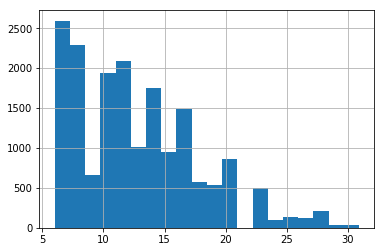

In [84]:
managers['int_rate'].hist(bins=20);

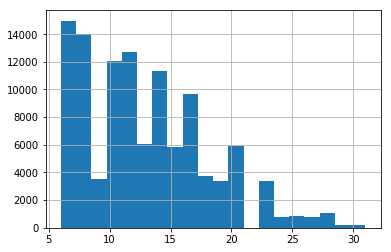

In [85]:
plebians['int_rate'].hist(bins=20);


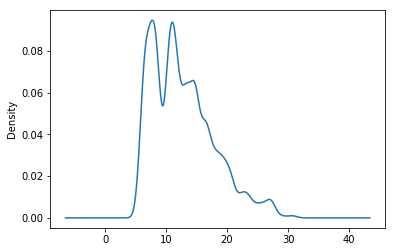

In [86]:
managers['int_rate'].plot.density()


In [87]:
df['int_rate'].mean()

12.929786234933374

In [88]:
managers['int_rate'].mean()

12.760582149647124

In [89]:
managers['int_rate'].mean()

12.760582149647124

In [90]:
df['issue_d']

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
5         Dec-2018
6         Dec-2018
7         Dec-2018
8         Dec-2018
9         Dec-2018
10        Dec-2018
11        Dec-2018
12        Dec-2018
13        Dec-2018
14        Dec-2018
15        Dec-2018
16        Dec-2018
17        Dec-2018
18        Dec-2018
19        Dec-2018
20        Dec-2018
21        Dec-2018
22        Dec-2018
23        Dec-2018
24        Dec-2018
25        Dec-2018
26        Dec-2018
27        Dec-2018
28        Dec-2018
29        Dec-2018
30        Dec-2018
31        Dec-2018
32        Dec-2018
33        Dec-2018
34        Dec-2018
35        Dec-2018
36        Dec-2018
37        Dec-2018
38        Dec-2018
39        Dec-2018
40        Dec-2018
41        Dec-2018
42        Dec-2018
43        Dec-2018
44        Dec-2018
45        Dec-2018
46        Dec-2018
47        Dec-2018
48        Dec-2018
49        Dec-2018
50        Dec-2018
51        Dec-2018
52        De

In [91]:
df['issue_d'].head(5)

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [95]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [94]:
df['issue_d'].head(5)

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [96]:
df['issue_d'].head().values


array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [97]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

In [0]:
#creates a new column by taking just year out of date

df['issue_year'] = df['issue_d'].dt.year

In [0]:
#creates a new column by taking just month out of date
df['issue_month'] = df['issue_d'].dt.month

In [101]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,110299

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],
                                        infer_datetime_format=True)

In [103]:
df['issue_d']

0        2018-12-01
1        2018-12-01
2        2018-12-01
3        2018-12-01
4        2018-12-01
5        2018-12-01
6        2018-12-01
7        2018-12-01
8        2018-12-01
9        2018-12-01
10       2018-12-01
11       2018-12-01
12       2018-12-01
13       2018-12-01
14       2018-12-01
15       2018-12-01
16       2018-12-01
17       2018-12-01
18       2018-12-01
19       2018-12-01
20       2018-12-01
21       2018-12-01
22       2018-12-01
23       2018-12-01
24       2018-12-01
25       2018-12-01
26       2018-12-01
27       2018-12-01
28       2018-12-01
29       2018-12-01
30       2018-12-01
31       2018-12-01
32       2018-12-01
33       2018-12-01
34       2018-12-01
35       2018-12-01
36       2018-12-01
37       2018-12-01
38       2018-12-01
39       2018-12-01
40       2018-12-01
41       2018-12-01
42       2018-12-01
43       2018-12-01
44       2018-12-01
45       2018-12-01
46       2018-12-01
47       2018-12-01
48       2018-12-01
49       2018-12-01


In [105]:
df['earliest_cr_line']

0        1996-01-01
1        2006-09-01
2        2011-04-01
3        1997-02-01
4        1995-01-01
5        2005-08-01
6        2003-11-01
7        1987-06-01
8        2001-04-01
9        2005-08-01
10       2005-04-01
11       2005-10-01
12       2010-09-01
13       1999-10-01
14       2007-05-01
15       2003-09-01
16       2004-10-01
17       2010-10-01
18       2005-07-01
19       2001-02-01
20       2004-12-01
21       2001-10-01
22       2002-12-01
23       2006-11-01
24       1999-09-01
25       2006-09-01
26       1996-08-01
27       2000-12-01
28       2006-02-01
29       2002-09-01
30       2004-11-01
31       1997-11-01
32       1998-08-01
33       2013-07-01
34       2005-07-01
35       2011-09-01
36       1999-08-01
37       1991-12-01
38       1991-07-01
39       1988-04-01
40       2012-09-01
41       2011-01-01
42       2014-10-01
43       2006-11-01
44       2014-10-01
45       2002-07-01
46       2009-09-01
47       2010-05-01
48       2001-10-01
49       2014-10-01


In [106]:
df['issue_d'] - df['earliest_cr_line']

0         8370 days
1         4474 days
2         2801 days
3         7973 days
4         8735 days
5         4870 days
6         5509 days
7        11506 days
8         6453 days
9         4870 days
10        4992 days
11        4809 days
12        3013 days
13        7001 days
14        4232 days
15        5570 days
16        5174 days
17        2983 days
18        4901 days
19        6512 days
20        5113 days
21        6270 days
22        5844 days
23        4413 days
24        7031 days
25        4474 days
26        8157 days
27        6574 days
28        4686 days
29        5935 days
30        5143 days
31        7700 days
32        7427 days
33        1979 days
34        4901 days
35        2648 days
36        7062 days
37        9862 days
38       10015 days
39       11201 days
40        2282 days
41        2891 days
42        1522 days
43        4413 days
44        1522 days
45        5997 days
46        3378 days
47        3136 days
48        6270 days
49        1522 days


In [107]:
#new column, sets in diff vals
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,0.0,0.0,0.0,Jul-2019,324.23,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8370
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,2006-09-01,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,0.0,0.0,0.0,Jul-2019,155.68,Sep-2019,Aug-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0,0,9,95.0,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,4474
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,2011-04-01,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Sep-2019

In [108]:
#stats
df['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64